In [1]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods
import OrbitalNeuralMethods as onm

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`


In [2]:
import Random
rng = Random.MersenneTwister();

In [8]:
import Plots as plt
plt.pyplot()

Plots.PyPlotBackend()

In [3]:
n = 2
ω = 0.25
ham = HOCoulomb(ω, shielding = 0.25);

l = 10
basis = SpinBasis(HOBasis(l, ω))
grid = [x for x in range(-10, stop = 10, length = 2001)]
system = System(n, basis, grid, ham);

mixer = Alpha(0.5)
rhf = RHF(system, mixer);
rhf = compute_ground_state!(rhf, max_iter = 100, tol = 1e-10, verbose=0);
energy(rhf)

1.17957942722023

In [4]:
slater = Slater(rhf);

In [60]:
nn = NeuralNetwork([Dense(32), Tanh, Dense(1), Exp], n=n, rng = rng);
wf = SlaterNN(slater, nn);
optimizer = ADAM(wf, lr = 0.01, max_iter = 1, tol = 1e-6);
#optimizer = GradientDescent(lr = 0.001, max_iter = 1, tol = 1e-6);

In [61]:
metro = Importance(equils = 1e4, samples = 1e5, step = 0.01);

In [62]:
max_iter = 500
e_i = zeros(max_iter)
wf_final = wf
for i in 1:max_iter
    wf_final, wf_opt, grad_results = optimize(wf_final, ham, metro, optimizer, nthreads = 12, verbose = true);
    e_i[i] = grad_results[1].E
end

E = 0.828405 iter = 1/1                                      

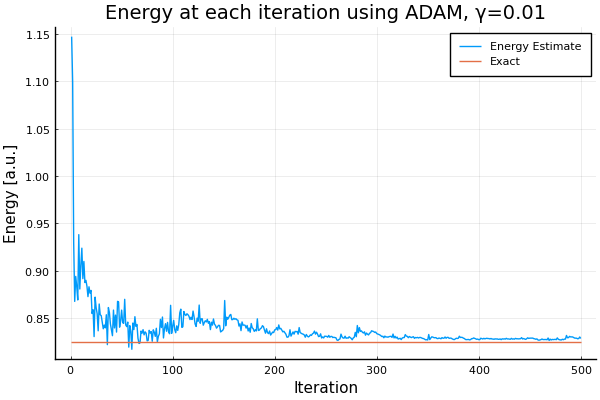

In [64]:
plt.plot(e_i, title="Energy at each iteration using ADAM, γ=0.01", xlabel="Iteration", ylabel="Energy [a.u.]", label="Energy Estimate")
plt.plot!([0, max_iter], [0.8247, 0.8247], label="Exact")

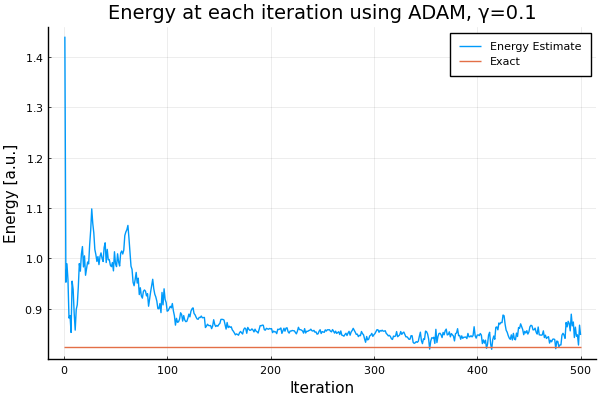

In [43]:
plt.plot(e_i, title="Energy at each iteration using ADAM, γ=0.1", xlabel="Iteration", ylabel="Energy [a.u.]", label="Energy Estimate")
plt.plot!([0, max_iter], [0.8247, 0.8247], label="Exact")

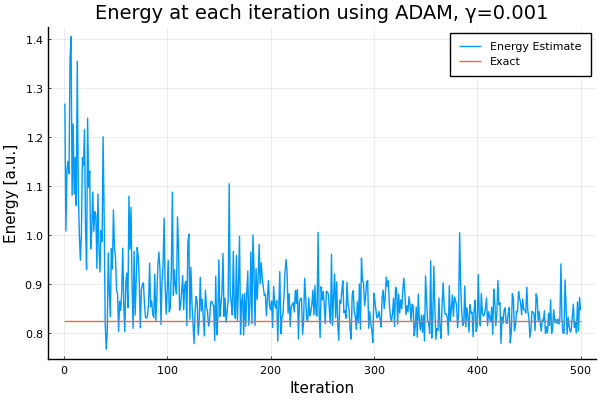

In [39]:
plt.plot(e_i, title="Energy at each iteration using ADAM, γ=0.001", xlabel="Iteration", ylabel="Energy [a.u.]", label="Energy Estimate")
plt.plot!([0, max_iter], [0.8247, 0.8247], label="Exact")

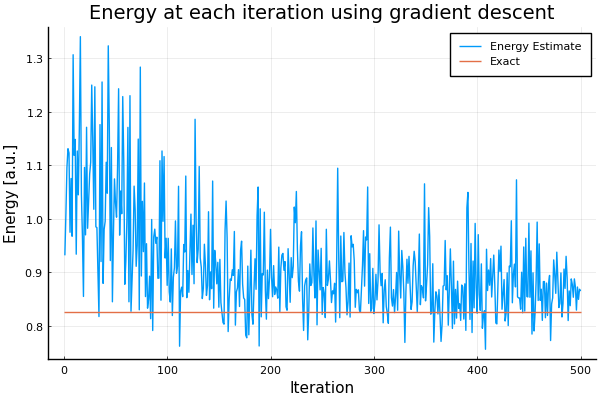

In [ ]:
plt.plot(e_i, title="Energy at each iteration using gradient descent", xlabel="Iteration", ylabel="Energy [a.u.]", label="Energy Estimate")
plt.plot!([0, max_iter], [0.8247, 0.8247], label="Exact")